## Bot

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = requests.get("https://api-testnet.bybit.com/v5/market/kline?category=inverse&symbol=BTCUSD&interval=60&start=1670601600000&end=1670608800000%20HTTP/1.1")

In [2]:
data = pd.DataFrame(x.json()["result"]["list"])

In [3]:
data

,0,1,2,3,4,5,6
0,1671318000000,16633.5,16633.5,16550,16633.5,6412,0.38564765
1,1671314400000,16629.5,16633.5,16543.5,16633.5,271641,16.37512636
2,1671310800000,16613.5,16697.5,16530,16629.5,44841,2.70233986
3,1671307200000,16604.5,16688,16487.5,16613.5,1009465,60.83110421
4,1671303600000,16591,16618,16527.5,16604.5,7229,0.43537039
...,...,...,...,...,...,...,...
195,1670616000000,17052,17053,16993,17011.5,368151,21.62320651
196,1670612400000,17055.5,17055.5,17027,17052,4089,0.23985328
197,1670608800000,17071,17073,17027,17055.5,268611,15.74462667
198,1670605200000,17071.5,17071.5,17061,17071,4177,0.24469757


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
 1   1       200 non-null    object
 2   2       200 non-null    object
 3   3       200 non-null    object
 4   4       200 non-null    object
 5   5       200 non-null    object
 6   6       200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [5]:
data.rename(columns={0:"Time", 1: "Open", 2: "High", 3: "Low", 4: "Close", 5: "Volume", 6: "Turnover"}, inplace=True)

In [6]:
def fixType(columnName, newType):
    data[columnName] = data[columnName].astype(newType)

In [9]:
fixType("Time", np.int64)

In [10]:
for col in data.columns[1:]:
    fixType(col, np.float64)

<Axes: >

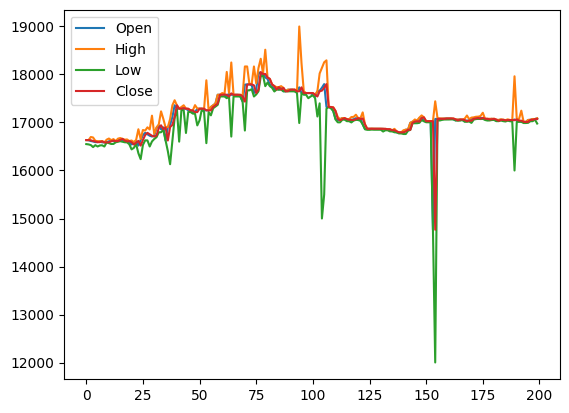

In [12]:
data.loc[:, "Open":"Close"].plot()

import requests

url = "https://api-testnet.bybit.com/v5/market/kline?category=inverse&symbol=BTCUSD&interval=60&start=1670601600000&end=1670608800000%20HTTP/1.1"
x = requests.get(url)

class Candle:
	def __init__(self, time, open, high, low, close, volume, turnover):
		self.time = int(time)
		self.open = float(open)
		self.high = float(high)
		self.low = float(low)
		self.close = float(close)
		self.volume = float(volume)
		self.turnover = float(turnover)

candles = list()  # Alternative: []
for candle in x.json()["result"]["list"]:
	c = Candle(candle[0], candle[1], candle[2], candle[3], candle[4], candle[5], candle[6])
	candles.append(c)